In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 1:3]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [3]:
rbf = OneVsRestClassifier(SVC(kernel='rbf', gamma=0.9, C=10))

In [4]:
rbf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=10, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.9, kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [5]:
y_pred = rbf.predict(X_test)

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [7]:
xtmp = np.arange(min(X[:,0]) - 1,max(X[:,0]) + 1,0.1)
ytmp = np.arange(min(X[:,1]) - 1,max(X[:,1]) + 1,0.1)
xv,yv = np.meshgrid(xtmp,ytmp)

In [8]:
Z = rbf.predict(np.c_[xv.ravel(), yv.ravel()]).reshape((len(ytmp),len(xtmp)))

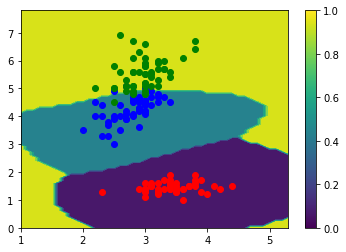

In [9]:
plt.contourf(xv, yv, Z, cmap='viridis')
feature1 = 0
feature2 = 1
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i,feature1],X[i,feature2],color='red')
    elif y[i] == 1:
        plt.scatter(X[i,feature1],X[i,feature2],color='blue')
    else:
        plt.scatter(X[i,feature1],X[i,feature2],color='green')
plt.colorbar()
plt.show()
